In [1]:
# COMP 309 - Assignment 1
# Student: Zhirui(Ray) Wang, ID: 300491848
# Task 1
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data
DATA1 = "steel-plates-fault.arff"
DATA2 = "ionosphere.arff"
DATA3 = "banknote-authentication.arff"

In [3]:
# Data Structures
clfs = [
    (KNeighborsClassifier(), {"n_neighbors": [1, 2, 3, 4, 5]}),
    (GaussianNB(), {"var_smoothing": [1e-9, 1e-5, 1e-1]}),
    (LogisticRegression(), {"C": [0.1, 0.5, 1.0, 2.0, 5.0]}),
    (DecisionTreeClassifier(), {"max_depth": [1, 3, 5, 8, 10]}),
    (GradientBoostingClassifier(), {"max_depth": [1, 3, 5, 8, 10]}),
    (RandomForestClassifier(), {"max_depth": [1, 3, 5, 8, 10]}),
    (MLPClassifier(), {"alpha": [1e-5, 1e-3, 0.1, 10]})
]

names = ["KNN", "GNB", "LR", "DT", "GB", "RF", "MLP"]
data_summay_list = []
data_men_summay_list = []
data_best_value_summay_list = []
NUM = 50

/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

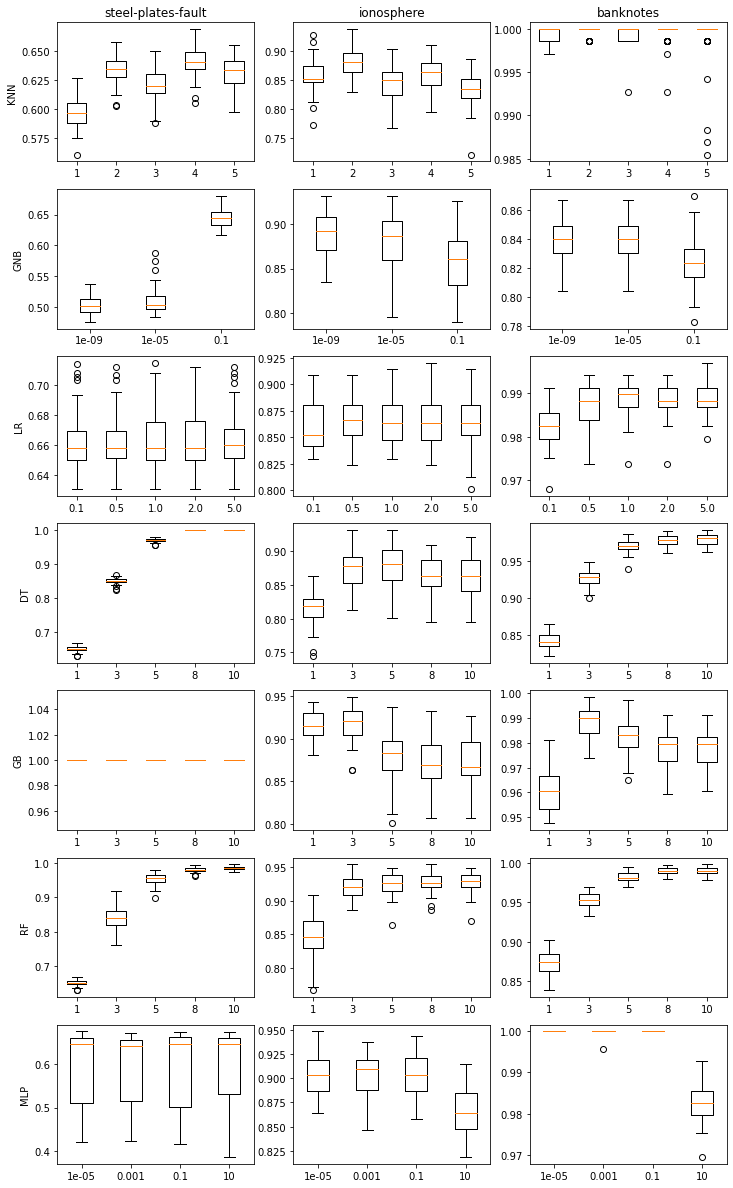

In [4]:
# Task 1(i) 7*3 boxplot print
figure, axs = plt.subplots(7, 3, figsize=(12, 21))

data_name = ["steel-plates-fault", "ionosphere", "banknotes"]
for idx, data in enumerate([DATA1, DATA2, DATA3]):
    # Load data as pandas dataframe
    d, ds = arff.loadarff(data)
    df = pd.DataFrame(d)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    y = LabelEncoder().fit_transform(y)

    # Split data into train and test
    for jdx, (clf, params) in enumerate(clfs):
        test_accs = []
        best_mean_list = []
        best_value_list = []
        for k, values in params.items():
            min_test_error = np.inf
            for value in values:
                test_accuracies = []
                new_clf = clf.set_params(**{k: value})
                
                # Range 50 Times
                for i in range(NUM):
                    random_state = i
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)
                    new_clf.fit(X_train, y_train)
                    y_pred = new_clf.predict(X_test)

                    accuracy = accuracy_score(y_test, y_pred)
                    test_accuracies.append(accuracy)

                # Get the best_value of test_error
                test_accs.append(test_accuracies)
                mean_test_error = 1 - np.mean(test_accs)
                if mean_test_error < min_test_error:
                    min_test_error = mean_test_error
                    best_value = value

            # Make Boxplot table
            ax = axs[jdx][idx]
            ax.boxplot(test_accs)
            ax.set_xticklabels(values)
            if idx == 0:
                ax.set_ylabel(names[jdx])

            if jdx == 0:
                ax.set_title(data_name[idx])

        # print("clf: {}, dataset: {}, best mean {}, best value: {}".format(names[jdx], data_name[idx], min_test_error, "{}={}".format(k, best_value)))

plt.show()

In [5]:
from prettytable import PrettyTable
print("The best mean table")
myTable = PrettyTable(["clf","steel-plates-fault", "ionosphere", "banknotes"])
myTable.add_row(["KNN","0.37554685890834194", "0.1314204545454547","0.00043731778425670775"])
myTable.add_row(["GNB","0.447799519395812", "0.11159090909090918","0.15997084548104934"])
myTable.add_row(["LR","0.33549330587023685", "0.13542613636363654", "0.012699708454810388"])
myTable.add_row(["DT","0.10542533470648818", "0.1401136363636365", "0.06108454810495623"])
myTable.add_row(["GB","0.0", "0.08261363636363628", "0.022602040816326552"])
myTable.add_row(["RF","0.11836869207003087", "0.08931818181818185", "0.04253061224489807"])
myTable.add_row(["MLP","0.4004016477857878", "0.09363636363636363", "0.00011661807580176653"])
print(myTable)

print("The best value table")
myTable2 = PrettyTable(["clf","steel-plates-fault", "ionosphere", "banknotes"])
myTable2.add_row(["KNN","5", "2","2"])
myTable2.add_row(["GNB","0.1", "1e-9","1e-5"])
myTable2.add_row(["LR","5.0", "2.0", "5.0"])
myTable2.add_row(["DT","10", "10", "10"])
myTable2.add_row(["GB","1", "3", "8"])
myTable2.add_row(["RF","10", "10", "10"])
myTable2.add_row(["MLP","10", "0.1", "0.1"])
print(myTable2)

The best mean table
+-----+---------------------+---------------------+------------------------+
| clf |  steel-plates-fault |      ionosphere     |       banknotes        |
+-----+---------------------+---------------------+------------------------+
| KNN | 0.37554685890834194 |  0.1314204545454547 | 0.00043731778425670775 |
| GNB |  0.447799519395812  | 0.11159090909090918 |  0.15997084548104934   |
|  LR | 0.33549330587023685 | 0.13542613636363654 |  0.012699708454810388  |
|  DT | 0.10542533470648818 |  0.1401136363636365 |  0.06108454810495623   |
|  GB |         0.0         | 0.08261363636363628 |  0.022602040816326552  |
|  RF | 0.11836869207003087 | 0.08931818181818185 |  0.04253061224489807   |
| MLP |  0.4004016477857878 | 0.09363636363636363 | 0.00011661807580176653 |
+-----+---------------------+---------------------+------------------------+
The best value table
+-----+--------------------+------------+-----------+
| clf | steel-plates-fault | ionosphere | banknotes |
+---

## Taks 1 (iii)
$$
  TestError = 1 - mean(AccuracyList)
$$
The best model can be analyzed from the above two tables. When the minimum test error approaches 0, 
it means that the model is more sensitive to the data.
### The best Model for steel-plates-fault
From first table we can see the GradientBoostingClassifier have minimum test error, that mean the accuracy is sensitive,
Based on second table, we can see the steel-plates-fault have best value of GradientBoostingClassifier is 1.
### The best Model for ionosphere
For ionosphere, from first table we can see the GradientBoostingClassifier have minimum test error,
based on second table, we can see the ionosphere best value of GradientBoostingClassifier is 3.
### The best Model for banknotes
For banknotes, from first table we can see the MLPClassifier have minimum test error,
based on second table, we can see the banknotes best value of MLPClassifier is 0.1.

In [6]:
#Taks 2
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_circles

from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, Birch, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture

In [7]:
clfs = [
    (KMeans(n_clusters=2), {}),
    (AffinityPropagation(), {}),
    (DBSCAN(), {}),
    (GaussianMixture(), {}),
    (Birch(), {}),
    (AgglomerativeClustering(), {}),
    (MeanShift(), {})
]

names = ["KMeans", "AP", "DBSCAN", "GMM", "Birch", "AC", "MS"]
random_state = 0
DATA1 = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=random_state)
DATA2 = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=random_state)
DATA3 = make_circles(n_samples=1000, noise=0.3, random_state=random_state)

/Users/zwang/Desktop/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(


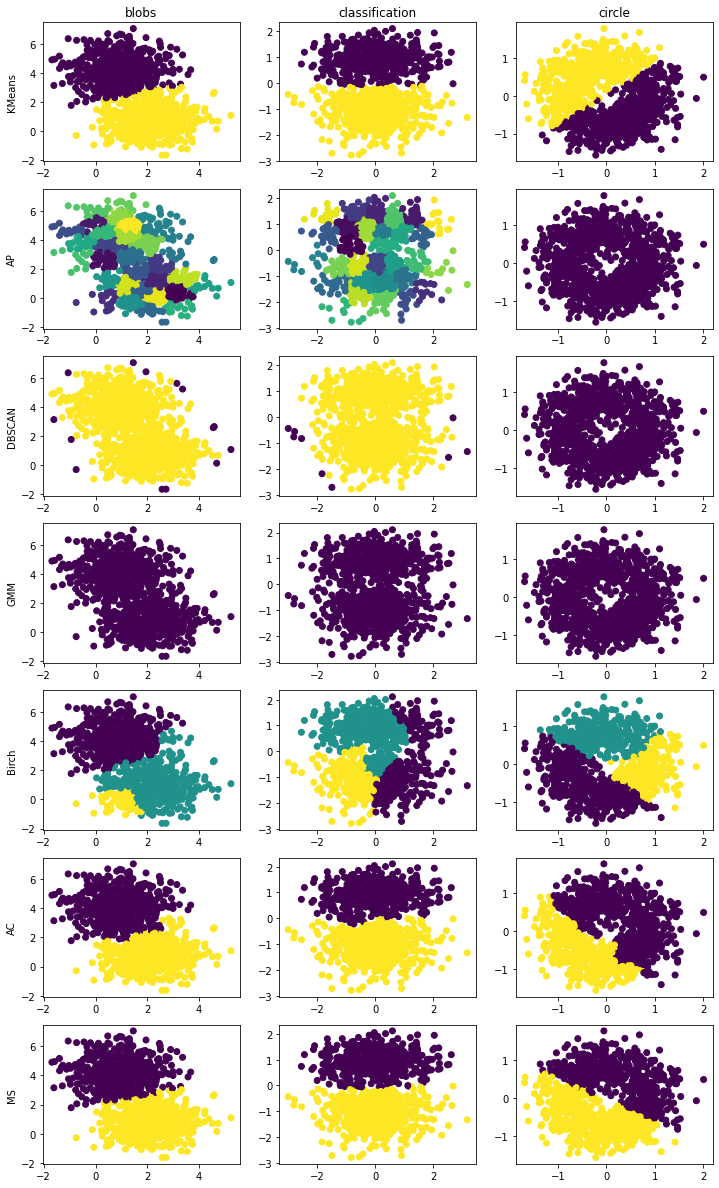

In [8]:
figure, axs = plt.subplots(7, 3, figsize=(12, 21))

data_name = ["blobs", "classification", "circle"]
for idx, data in enumerate([DATA1, DATA2, DATA3]):
    X, y = data[0], data[1]

    for jdx, (clf, params) in enumerate(clfs):
        test_accs = []

        y_pred = clf.fit_predict(X, y)

        ax = axs[jdx][idx]
        ax.scatter(X[:, 0], X[:, 1], c=y_pred)
        if idx == 0:
            ax.set_ylabel(names[jdx])

        if jdx == 0:
            ax.set_title(data_name[idx])

plt.show()

## Task 2 (ii)
### K-Means
K-Means algorithm: At the beginning of the algorithm operation, Kmeans will randomly select K center points in the range of the data set, and then cluster according to the K center points.
Advantages: very fast algorithm, able to handle large data sets
Disadvantages: Need to specify the number of clusters before executing the algorithm, sensitive to outliers
### Affinity Propagation
The affinity propagation method models each data point as a node in the network. During the clustering process, real-valued messages are exchanged recursively between data points until a set of high-quality samples and corresponding clusters emerge.
Advantages: The main advantage of hierarchical clustering is that clusters are not assumed to be spherical. At the same time, it scales well to larger datasets.
Disadvantage: user has to choose the number of clusters
### DBSCAN
DBSCAN does not assume spherical clusters and its performance is scalable. Also, it does not require assigning every point to a cluster, thus reducing cluster noise
### Gaussian Mixture Model
The Gaussian mixture model is a general generative unsupervised learning or clustering model. It is also called expectation-maximizing clustering or EM clustering and is based on an optimization strategy. Gaussian mixture models are used to represent normally distributed subpopulations within the overall population. The advantage of mixed models is that they do not require which subpopulation the data points belong to. It allows the model to automatically learn subpopulations. This constitutes a form of unsupervised learning.
### BIRCH
BIRCH is an unsupervised data mining algorithm for implementing hierarchical clustering on particularly large datasets. One of Birch's strengths is its ability to incrementally and dynamically cluster incoming multidimensional quantities of data points to produce the best quality clusters for a given set of resources (memory and time constraints). In most cases, Birch only needs one scan of the database. Furthermore, Birch is considered "the first clustering algorithm proposed in the database field to efficiently handle 'noise' (data points that do not belong to the underlying pattern).
### Agglomerative Clustering
Agglomerative clustering is a set of algorithms based on the same idea: (1) Start with each point in its own cluster. (2) For each cluster, merge it with another cluster according to some criteria. (3) Repeat until only one cluster remains and you are left with a hierarchy of clusters.
The characteristic is that clusters are not assumed to be spherical. Also, it scales well to larger datasets.
### Mean Shift
Mean-Shift does not require any model assumptions as K-means does.
Complex clusters with non-convex shapes can be modeled with only one parameter called bandwidth, which automatically determines the number of clusters.
Outliers do not cause problems.